# DS3000 Day 6

Feb 3, 2025

Admin

- Phase I due **Friday, Feb. 7** (Group submission to Gradescope, see ProjectGuidelines on Canvas)
- Homework 2 due **Friday, Feb. 14**
- Homework 3 will be posted then, due **Thursday, March 13**
- Lab 2 will be on **Monday, Feb. 10**
- Take-Home Coding Exam will be posted on **Monday, Feb. 10**, due **Sunday, Feb. 16**

Push-Up Tracker
- Section 04: 2

Content:
- Exploring Data
    - Finish Plotting
    - Cleaning Data
    - Basic Data Summaries and Intro to Vectors
         - (This leads us into the **MATH** part of the course!)
![s](https://64.media.tumblr.com/64473de68f3efee55b24dc1d5c881458/8f9b7a2f21d7b8ff-04/s1280x1920/08b38e3b7a1d8baddcc77f8f1e8f5f71257f6317.jpg)

In [2]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px

In [3]:
# source (https://www.kaggle.com/datasets/alexandrepetit881234/korean-demographics-20002022)
df_korea = pd.read_csv('korea_demo.zip')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


## found this about groupby() and the mean
https://stackoverflow.com/questions/71731100/pandas-groupby-syntax-explanation

# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show relationship between `Marriage_rate` as `Region` varies.

- `plt.subplot(n_rows, n_cols, desired_subplot)`
- figure vs axis (`plt.gcf()` and `plt.gca()`)
- labelling subplot title
- making a bigger figure
    - `plt.figure(figsize=(10, 5))`
        - make a new figure and specify its size
    - `plt.gcf().set_size_inches(15, 7)`
        - get the current figure `gcf()` and set its size
- `plt.ylim()`

          Date Region   Birth  Birth_rate   Death  Death_rate  Divorce  \
0     1/1/2000  Busan  3752.0       11.61  1875.0         5.8    814.0   
18    2/1/2000  Busan  3632.0       12.02  1453.0         4.8    802.0   
36    3/1/2000  Busan  3935.0       12.19  1607.0         5.0    910.0   
54    4/1/2000  Busan  3464.0       11.08  1541.0         4.9    721.0   
72    5/1/2000  Busan  3511.0       10.88  1417.0         4.4    864.0   
...        ...    ...     ...         ...     ...         ...      ...   
4770  2/1/2022  Busan  1158.0        4.50  2350.0         9.2    470.0   
4788  3/1/2022  Busan  1259.0        4.50  3629.0        12.8    435.0   
4806  4/1/2022  Busan  1245.0        4.60  2452.0         9.0    422.0   
4824  5/1/2022  Busan  1179.0        4.20  2144.0         7.6    426.0   
4842  6/1/2022  Busan  1125.0        4.10  1793.0         6.6    507.0   

      Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0              2.5    2435.0            7.5     

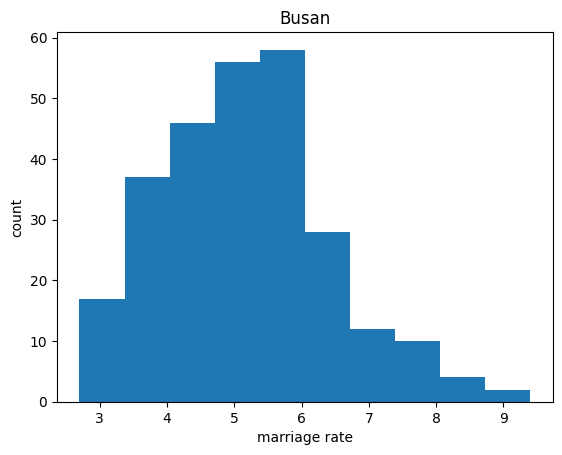

In [8]:
# build one plot, then add loop to make subplot
# let's do Busan

#here we are checking if the region is Busan, if it is then the bool_busan will store True, else Falase
bool_busan = df_korea['Region'] == 'Busan'

#here we obtaining the rows for which bool_busan is True
df_busan = df_korea.loc[bool_busan, :]
print(df_busan)

# How can i increase the ticksize in this plot?
plt.hist(df_busan['Marriage_rate'], bins=10)
plt.xlabel('marriage rate')
plt.ylabel('count')
plt.gca().title.set_text('Busan')




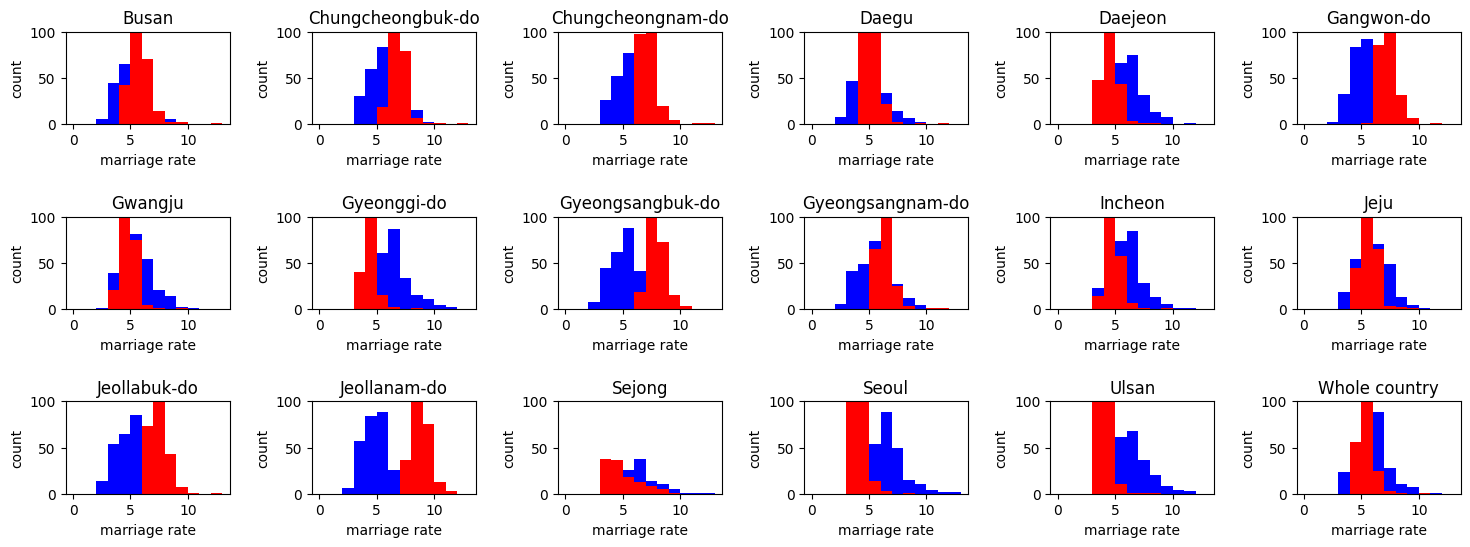

In [10]:
# now all of the regions
# a useful function to convert an array to a list is .tolist()
region_list = df_korea['Region'].unique().tolist()
bins = np.linspace(0, 13, 14)
for region in region_list:
    # activate a specific subplot (use .index() to find the numeric index for the current string)
    region_idx = region_list.index(region)

    # subplot(nrows, ncols, index, **kwargs) <- so nrows is 3, ncols os 6 and index is +1
    plt.subplot(3, 6, region_idx + 1)
    
    # build df_region, only includes rows with the region of interest
    bool_region = df_korea['Region'] == region
    # Here we are g,etting all the rows that are related to the region of interest
    df_region = df_korea.loc[bool_region, :]
    
    # plot histogram
    plt.hist(df_region['Marriage_rate'], bins=bins,color='b')
    plt.hist(df_region['Death_rate'], bins=bins,color='r')
    plt.xlabel('marriage rate')
    plt.ylabel('count')
    # we only want the y-axis label on the first subplot of each row
    if region_idx in (0, 6, 12):
        plt.ylabel('count')
    
    plt.gca().title.set_text(region_list[region_idx]) 
    
    # may need to play around with this to make sure all plots have same/informative y range
    plt.ylim(0, 100)
    
# resizes the whole figure .set_size_inches(width_inches, height_inches) 
plt.gcf().set_size_inches(18, 6)

# (++) adjust spacing between graphs (can play around with this until it looks nice)
plt.subplots_adjust(wspace=.5, hspace=1)

# Lets do one for Birth_rate and Natural growth rate

## Scatter plots

What is the relationship between `Marriage_rate` and `National_growth_rate` in:
1. `Seoul`
1. `Busan`

skills:
- `plt.scatter`
- `alpha`
- multiple scatters on same plot
- legend
- log scale

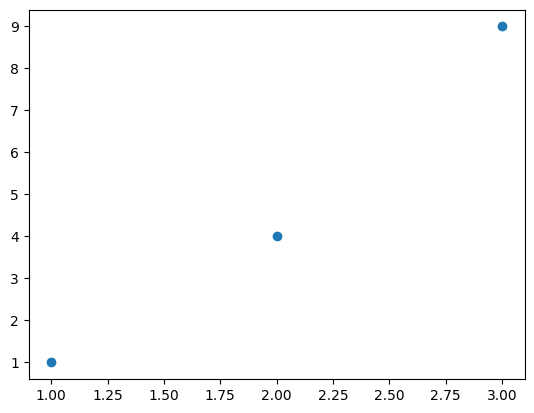

In [11]:
# simple scatter example
x = [1, 2, 3]
y = [1, 4, 9]
plt.scatter(x, y)

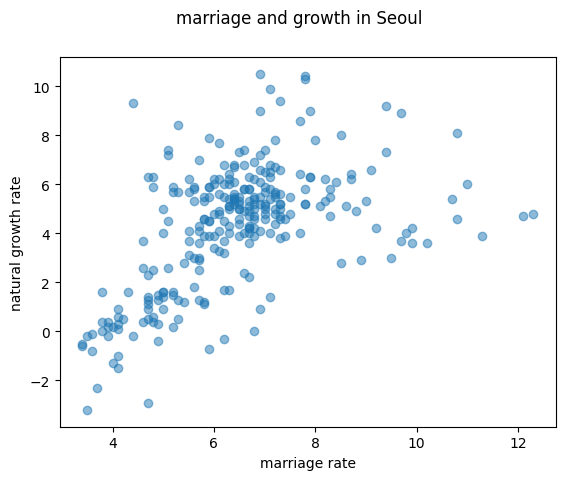

In [12]:
# select only rows corresponding to given region
bool_seoul = df_korea['Region'] == 'Seoul'
df_seoul = df_korea.loc[bool_seoul, :]

# scatter
plt.scatter(df_seoul['Marriage_rate'],
            df_seoul['Natural_growth_rate'], alpha=.5)

# label
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
plt.suptitle('marriage and growth in Seoul');

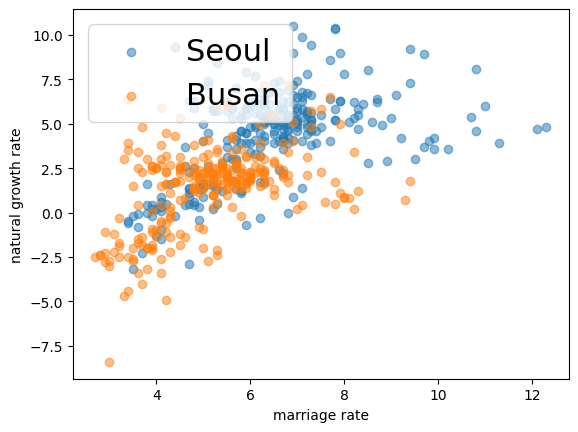

In [13]:
two_regions = ['Seoul', 
               'Busan']

for region in two_regions:
    # boolean index
    bool_region = df_korea['Region'] == region
    df_region = df_korea.loc[bool_region, :]

    # scatter
    plt.scatter(df_region['Marriage_rate'],
                df_region['Natural_growth_rate'], alpha=.5, label=region)
    
# plt.legend()
plt.xlabel('marriage rate')
plt.ylabel('natural growth rate')
# plt.gcf().set_size_inches(10, 8)
# plt.suptitle('comparing relationship of marriage and growth in Seoul and Busan')

# You can always change the position of where the legend would be. It is easy. Lets do it. (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
plt.legend(loc='upper left',fontsize=22)

# Line Plots

What was the mean `Marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- line style (width, color, dot/dash)
- label & legend
- `fill_between()`

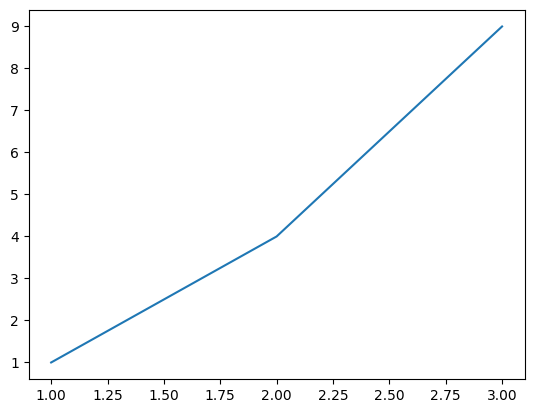

In [14]:
# simple line plot example
x = [1, 2, 3]
y = [1, 4, 9]
plt.plot(x, y)

In [18]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

# unfortunately, these are strings right now, not dates
# use .to_datetime from pandas to convert a string column to a date (pay attention to format of dates)
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [19]:
print(df_korea['Region'].unique())
# need to remove the Whole country observations (otherwise mean will be skewed)
bool_nocountry = df_korea['Region'] != 'Whole country'
df_korea_new = df_korea.loc[bool_nocountry, :]

# check the values of Region in the new data set to make sure Whole country is gone
df_korea_new['Region'].unique()

['Busan' 'Chungcheongbuk-do' 'Chungcheongnam-do' 'Daegu' 'Daejeon'
 'Gangwon-do' 'Gwangju' 'Gyeonggi-do' 'Gyeongsangbuk-do'
 'Gyeongsangnam-do' 'Incheon' 'Jeju' 'Jeollabuk-do' 'Jeollanam-do'
 'Sejong' 'Seoul' 'Ulsan' 'Whole country']


array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan'],
      dtype=object)

In [21]:
mean_marriage_by_date = df_korea_new.groupby('Date').Marriage_rate.mean()
mean_marriage_by_date

Date
2000-01-01    7.306250
2000-02-01    6.956250
2000-03-01    7.437500
2000-04-01    6.912500
2000-05-01    8.356250
                ...   
2022-02-01    3.870588
2022-03-01    3.447059
2022-04-01    3.658824
2022-05-01    3.805882
2022-06-01    3.452941
Name: Marriage_rate, Length: 270, dtype: float64

# What if i want two different color lines!!

![h](https://media.makeameme.org/created/today-lets-make.jpg)

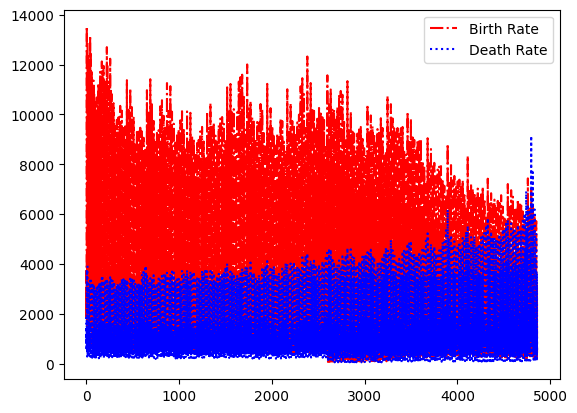

In [23]:
# linestyle ':' dotted, '--' dashed, '-.' mixed, '-' solid
plt.plot(df_korea_new['Birth'],  color='r',label='Birth Rate',linestyle='-.')
plt.plot(df_korea_new['Death'], color='b',label='Death Rate',linestyle=':')
plt.legend()

## `plt.fill_between()`

Shades between two line plots.  Great for showing how the data is distributed around its mean

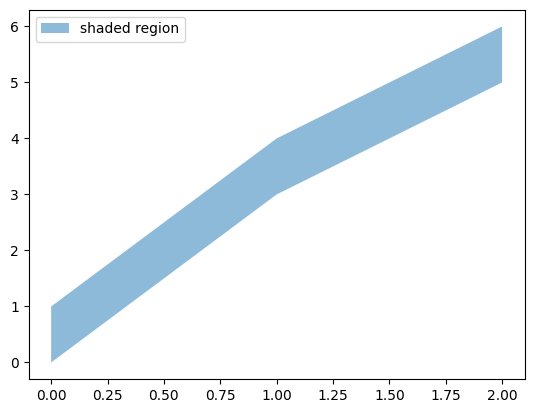

In [24]:
# simple fill between example
x = [0, 1, 2]
top = [1, 4, 6]
btm = [0, 3, 5]
plt.fill_between(x, top, btm, alpha=.5, label='shaded region')
plt.legend()

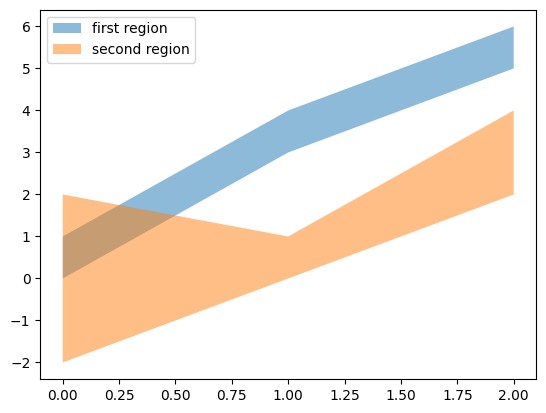

In [25]:
# slightly more complex example
x = [0, 1, 2]
regions = pd.Series({'top1': [1, 4, 6],
                    'top2': [2, 1, 4],
                    'btm1': [0, 3, 5],
                    'btm2': [-2, 0, 2]})
labels = ['first region', 'second region']

for area in range(2):
    plt.fill_between(x, regions[area], regions[area+2], alpha = .5, label = labels[area])

plt.legend()

## Tip: Shop around for just the right graph

Seaborn has some more niche graphs which are fantastic for specific applications.  While we won't cover the syntax on each of these, you'll find they're similar to what we've already covered.

Take a few minutes outside of class to browse these graphs to see whats out there:

[https://seaborn.pydata.org/examples/index.html](https://seaborn.pydata.org/examples/index.html)

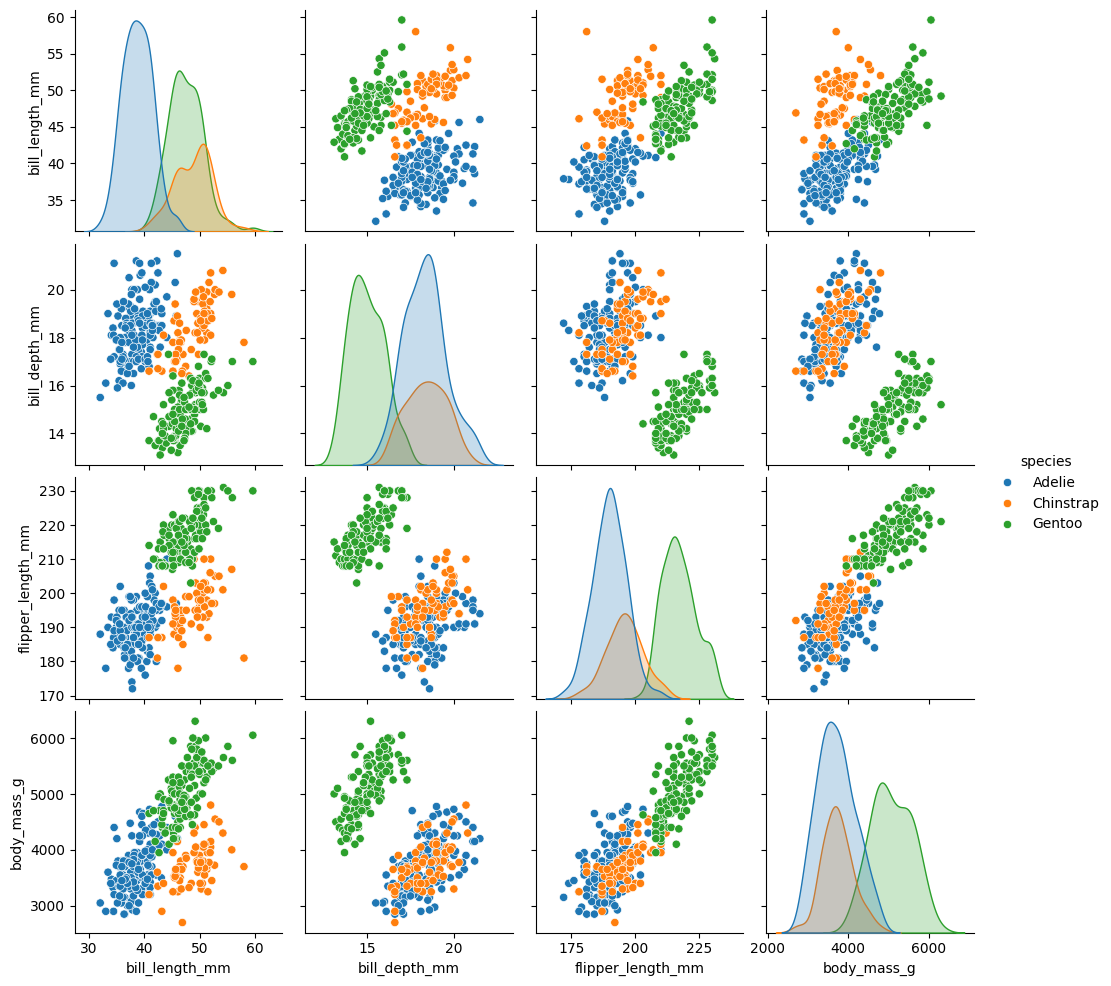

In [27]:
df_penguin = sns.load_dataset('penguins')

sns.pairplot(df_penguin, hue='species')

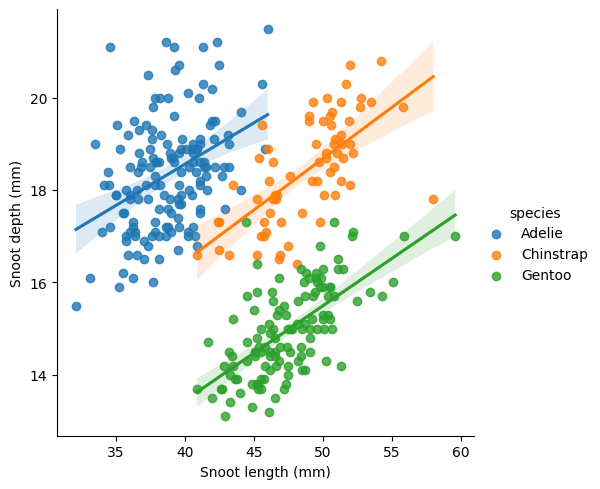

In [28]:
# Plot bill depth as a function of bill length by species
g = sns.lmplot(
    data=df_penguin,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

# Plotly
* Interactive visualization library
* https://plot.ly/python/ (https://plot.ly/python/getting-started/)
* Plotly is a big library, plotly express is a simplified interface
* Plotly uses different syntax as matplotlib / seaborn :(!

![he](https://media.makeameme.org/created/plotly-so-hot.jpg)

### Plotly scatter plots
- `hover_data`
- `color`
- `symbol`
- `size`

In [30]:
# use the df_korea_new which removed Whole country
# discard rows which are missing any feature
df_korea_nomiss = df_korea_new.dropna(axis=0, how='any')
print(df_korea_nomiss.shape)

df_korea_nomiss.head()

(4439, 12)


,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [31]:
import plotly.express as px
fig=px.scatter(df_korea_nomiss, x='Marriage_rate', y='Natural_growth_rate', hover_data=['Date', 'Region'], size='Divorce_rate')
fig.show('iframe')

## Saving a Plotly Figure
* html is a great format to share your *interactive* plot

In [32]:
import plotly

plotly.offline.plot(fig, filename='class_data.html');

## Plotly does line plots too

- color

In [33]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'x':  [1, 2, 3, 4, 5, 6],
                   'y':  [2, 3, 4, 7, 10, 24],
                  'grp': [0, 1, 0, 1, 0, 1]})
df

,x,y,grp
0,1,2,0
1,2,3,1
2,3,4,0
3,4,7,1
4,5,10,0
5,6,24,1


In [34]:
fig=px.line(data_frame=df, x='x', y='y', color='grp')
fig.show('iframe')

## Cleaning Data before Numerical Summaries

Before we can truly begin discussing calucating numerical summaries of our data, we need to make sure our data are clean! Missing values, incorrect values, etc. These can all cause issues in calculating the basic statistics we use to summarize data. 

![g](https://www.geopoll.com/wp-content/uploads/2021/01/outlier-illustration-copy.jpg)


## Data cleaning is an important step, before doing any kind of summaries of the data or plotting!

## What can we foresee as a problem when we do this:

`df_korea_nomiss = df_korea.dropna(axis=0, how='any')`

A) We would remove all rows that have an empty value for a column, but it can lead to some important data being removed.

B) I think this is okay, I do not mind losing some data samples.



Hence we can always make some condition to remove data for some condition:

In [6]:
print(df_korea.shape)
age_bool = (df_korea.Birth > 1500) & (df_korea.Birth < 2000)
gtky_ageonly = df_korea.loc[age_bool,:]
gtky_ageonly

(4860, 12)


,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2
5,1/1/2000,Gangwon-do,1966.0,14.91,1067.0,8.1,304.0,2.3,817.0,6.2,899.0,6.8
19,2/1/2000,Chungcheongbuk-do,1722.0,14.57,878.0,7.4,257.0,2.2,753.0,6.4,844.0,7.1
22,2/1/2000,Daejeon,1752.0,16.17,467.0,4.3,307.0,2.8,757.0,7.0,1285.0,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...
4320,1/1/2020,Busan,1567.0,5.50,2141.0,7.5,450.0,1.6,1125.0,3.9,-574.0,-2.0
4329,1/1/2020,Gyeongsangnam-do,1633.0,5.80,2174.0,7.7,590.0,2.1,1197.0,4.2,-541.0,-1.9
4330,1/1/2020,Incheon,1538.0,6.20,1487.0,6.0,603.0,2.4,1113.0,4.5,51.0,0.2
4473,9/1/2020,Gyeongsangnam-do,1516.0,5.60,1833.0,6.7,690.0,2.5,815.0,3.0,-317.0,-1.2


# Cleaning Data Speed Run

![g](https://miro.medium.com/v2/resize:fit:500/0*a_-_wgLECH1854Lk.jpg)


## DataFrame Manipulations

- Missing values (NaN)
    - why they're there
    - what to do with them
        - discard data
        - fill all missing values in with something reasonable

**Note:** There is much more we could talk about in terms of dealing with missing data; this is just a basic overview. You may want to consider investigating other options if you run into missing data issues on your projects

## Missing Data

* Pandas automatically assigns **NaN**, "Not a Number", to missing values while reading a file

## Remember, when you open a csv file in Excel or Numbers, you would not see **NaN** You will just see empty cell

* some folks use other values to indicate a "missing" value
    - `-99` is popular, for some reason ...
    - use `na_values` argument of `read_csv()` to mark other values as **NaN**

## Please do not do this though:
![gd](https://media.geeksforgeeks.org/wp-content/uploads/20230502161948/WhatsApp-Image-2020-07-01-at-20925-AM.jpeg)

![he](https://media.tenor.com/dHVat9e2S38AAAAM/rat-cry-mouse-cutie.gif)

In [7]:
# get the pokedate from Homework module in canvas
# load into jupyter
df_poke = pd.read_csv('pokedata.csv')
print(df_poke)
# use .rename to make all the column names lower case
# we can also pass a function which operates on each index / column
def make_lower(x):
    return str(x).lower()
df_poke.rename(make_lower, axis = 1, inplace=True)

# set the index to the pokedex number
df_poke.set_index('pokedex', inplace=True)
df_poke.head()

     Pokedex     Pokemon MainType SecondaryType  Height  Weight  Damage  \
0          1   Bulbasaur    Grass        Poison      24    25.2      45   
1          2     Ivysaur    Grass        Poison      39    28.7      60   
2          3    Venusaur    Grass        Poison      79   220.5      80   
3          4  Charmander     Fire           NaN      24    18.7      39   
4          5  Charmeleon     Fire           NaN      43    41.9      58   
..       ...         ...      ...           ...     ...     ...     ...   
146      147     Dratini   Dragon           NaN      71     7.3      41   
147      148   Dragonair   Dragon           NaN     157    36.4      61   
148      149   Dragonite   Dragon        Flying      87   463.0      91   
149      150      Mewtwo  Psychic           NaN      79   269.0     106   
150      151         Mew  Psychic           NaN      16     8.8     100   

     BaseSpeed  Attack  Defense  
0           45      49       49  
1           60      62       63

,pokemon,maintype,secondarytype,height,weight,damage,basespeed,attack,defense
pokedex,,,,,,,,,
1,Bulbasaur,Grass,Poison,24,25.2,45,45,49,49
2,Ivysaur,Grass,Poison,39,28.7,60,60,62,63
3,Venusaur,Grass,Poison,79,220.5,80,80,82,83
4,Charmander,Fire,NaN,24,18.7,39,65,52,43
5,Charmeleon,Fire,NaN,43,41.9,58,80,64,58


Notice that `secondarytype` is missing for Charmander and Charmeleon, and that pandas uses default NaN. Sometimes your missing data is in a different format, however:

In [13]:
# what about data with som eother way of identifying missing data?
# notice also a new read_ function
!pip3 install openpyxl --break-system-packages

df_miss = pd.read_excel('miss_data.xlsx')
df_miss


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python3.13 -m pip install --upgrade pip


,patient,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
0,a,180,78,45,39,miss,42,40,miss
1,b,164,67,47,49,43,48,miss,miss
2,c,miss,miss,42,miss,46,47,42,miss
3,d,miss,miss,23,miss,miss,17,miss,miss
4,e,199,89,38,40,44,48,miss,miss
5,f,134,54,34,36,29,22,miss,miss
6,g,163,59,50,50,miss,46,49,miss
7,h,175,72,43,37,35,31,miss,miss
8,i,158,80,28,miss,38,34,39,miss
9,j,169,79,33,miss,25,28,miss,miss


In [15]:
df_miss = pd.read_excel('miss_data.xlsx', index_col = 'patient', na_values = ('miss'))
df_miss

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
d,NaN,NaN,23,NaN,NaN,17,NaN,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN


### What to do with missing data?

* Option 0: Nothing (we've done this)
* Option 1: Discard all rows which are missing data (we've done this!)
* Option 2: Fill in missing data with reasonble guesses (impute; we haven't done this....)
  

### What to do with missing data?
* Option 0: Nothing
    - When the `skipna=True`, we ignore NaN in our averaging
    - other pandas methods, besides `DataFrame.mean()`, have `skipna` too

In [16]:
# mean of each column (skip any NaN values, the default)
df_miss.mean(axis=0)

height        167.750000
weight         72.250000
trial0         38.300000
trial1         41.833333
trial2         37.142857
trial3         36.300000
trial4         42.500000
finaltrial           NaN
dtype: float64

In [17]:
# mean of each column (dont skip any NaN values)
df_miss.mean(axis=0, skipna=False)


height         NaN
weight         NaN
trial0        38.3
trial1         NaN
trial2         NaN
trial3        36.3
trial4         NaN
finaltrial     NaN
dtype: float64

### What to do with missing data?

* Option 1: Discard all rows / columns which have missing data
    - appropriate when we have other data which contains similar information as discarded rows
    - `DataFrame.dropna()`: drop all rows or columns with missing data
        - axis
        - how: 'any', 'all' (do we drop row / column if ...
            - 'any' of its values are nan
            - 'all' of its values are nan

In [18]:
# drop rows with any nan values (default) ... nothing left
print(df_miss)

df_miss.dropna()

         height  weight  trial0  trial1  trial2  trial3  trial4  finaltrial
patient                                                                    
a         180.0    78.0      45    39.0     NaN      42    40.0         NaN
b         164.0    67.0      47    49.0    43.0      48     NaN         NaN
c           NaN     NaN      42     NaN    46.0      47    42.0         NaN
d           NaN     NaN      23     NaN     NaN      17     NaN         NaN
e         199.0    89.0      38    40.0    44.0      48     NaN         NaN
f         134.0    54.0      34    36.0    29.0      22     NaN         NaN
g         163.0    59.0      50    50.0     NaN      46    49.0         NaN
h         175.0    72.0      43    37.0    35.0      31     NaN         NaN
i         158.0    80.0      28     NaN    38.0      34    39.0         NaN
j         169.0    79.0      33     NaN    25.0      28     NaN         NaN


,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,


In [19]:
# drop columns with all nan values (unlikely, but possible)
print(df_miss)

h=df_miss['height'].dropna()
print(h)

         height  weight  trial0  trial1  trial2  trial3  trial4  finaltrial
patient                                                                    
a         180.0    78.0      45    39.0     NaN      42    40.0         NaN
b         164.0    67.0      47    49.0    43.0      48     NaN         NaN
c           NaN     NaN      42     NaN    46.0      47    42.0         NaN
d           NaN     NaN      23     NaN     NaN      17     NaN         NaN
e         199.0    89.0      38    40.0    44.0      48     NaN         NaN
f         134.0    54.0      34    36.0    29.0      22     NaN         NaN
g         163.0    59.0      50    50.0     NaN      46    49.0         NaN
h         175.0    72.0      43    37.0    35.0      31     NaN         NaN
i         158.0    80.0      28     NaN    38.0      34    39.0         NaN
j         169.0    79.0      33     NaN    25.0      28     NaN         NaN
patient
a    180.0
b    164.0
e    199.0
f    134.0
g    163.0
h    175.0
i    158.0
j  

In [23]:
# drop row if it does not have at least three values that are **not** NaN
print(df_miss)
# df_miss.dropna(thresh=4)
#df_miss.dropna(thresh=4)
df_miss.dropna(thresh=3)

         height  weight  trial0  trial1  trial2  trial3  trial4  finaltrial
patient                                                                    
a         180.0    78.0      45    39.0     NaN      42    40.0         NaN
b         164.0    67.0      47    49.0    43.0      48     NaN         NaN
c           NaN     NaN      42     NaN    46.0      47    42.0         NaN
d           NaN     NaN      23     NaN     NaN      17     NaN         NaN
e         199.0    89.0      38    40.0    44.0      48     NaN         NaN
f         134.0    54.0      34    36.0    29.0      22     NaN         NaN
g         163.0    59.0      50    50.0     NaN      46    49.0         NaN
h         175.0    72.0      43    37.0    35.0      31     NaN         NaN
i         158.0    80.0      28     NaN    38.0      34    39.0         NaN
j         169.0    79.0      33     NaN    25.0      28     NaN         NaN


,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,NaN,NaN
c,NaN,NaN,42,NaN,46.0,47,42.0,NaN
e,199.0,89.0,38,40.0,44.0,48,NaN,NaN
f,134.0,54.0,34,36.0,29.0,22,NaN,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,NaN,NaN
i,158.0,80.0,28,NaN,38.0,34,39.0,NaN
j,169.0,79.0,33,NaN,25.0,28,NaN,NaN


In [34]:
# drop only if NaN in specific column
print(df_miss)
df_miss.dropna(subset=['trial4','trial1'])

         height  weight  trial0  trial1  trial2  trial3  trial4  finaltrial
patient                                                                    
a         180.0    78.0      45    39.0     NaN      42    40.0         NaN
b         164.0    67.0      47    49.0    43.0      48     NaN         NaN
c           NaN     NaN      42     NaN    46.0      47    42.0         NaN
d           NaN     NaN      23     NaN     NaN      17     NaN         NaN
e         199.0    89.0      38    40.0    44.0      48     NaN         NaN
f         134.0    54.0      34    36.0    29.0      22     NaN         NaN
g         163.0    59.0      50    50.0     NaN      46    49.0         NaN
h         175.0    72.0      43    37.0    35.0      31     NaN         NaN
i         158.0    80.0      28     NaN    38.0      34    39.0         NaN
j         169.0    79.0      33     NaN    25.0      28     NaN         NaN


,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,NaN,42,40.0,NaN
g,163.0,59.0,50,50.0,NaN,46,49.0,NaN


### What to do with missing data?

* Option 2: Fill in missing data
    - appropriate when we don't have much data, let's not waste any!
    - some known value
        - `DataFrame.fillna(value)`
    - some average value
        - `DataFrame.interpolate(method='zero')

In [38]:
# if the trial is missing, let us assume they deserve a 0
print(df_miss)

df_miss.fillna(1)

         height  weight  trial0  trial1  trial2  trial3  trial4  finaltrial
patient                                                                    
a         180.0    78.0      45    39.0     NaN      42    40.0         NaN
b         164.0    67.0      47    49.0    43.0      48     NaN         NaN
c           NaN     NaN      42     NaN    46.0      47    42.0         NaN
d           NaN     NaN      23     NaN     NaN      17     NaN         NaN
e         199.0    89.0      38    40.0    44.0      48     NaN         NaN
f         134.0    54.0      34    36.0    29.0      22     NaN         NaN
g         163.0    59.0      50    50.0     NaN      46    49.0         NaN
h         175.0    72.0      43    37.0    35.0      31     NaN         NaN
i         158.0    80.0      28     NaN    38.0      34    39.0         NaN
j         169.0    79.0      33     NaN    25.0      28     NaN         NaN


,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,1.0,42,40.0,1.0
b,164.0,67.0,47,49.0,43.0,48,1.0,1.0
c,1.0,1.0,42,1.0,46.0,47,42.0,1.0
d,1.0,1.0,23,1.0,1.0,17,1.0,1.0
e,199.0,89.0,38,40.0,44.0,48,1.0,1.0
f,134.0,54.0,34,36.0,29.0,22,1.0,1.0
g,163.0,59.0,50,50.0,1.0,46,49.0,1.0
h,175.0,72.0,43,37.0,35.0,31,1.0,1.0
i,158.0,80.0,28,1.0,38.0,34,39.0,1.0


### Filling In a Different Value for Each Column

* Sometimes (as with height and weight) it doesn't make sense to give same value to everything
* Can fill in each column with a different value
* Pass in a dictionary containing column names as keys and desired NA values as values
    * **fillna(dictionary_of_values)**
    
    

In [28]:
dict_fill = {'height': 170,
             'weight': 70,
             'trial0': 50,
             'trial1': 45,
             'trial2': 40,
             'trial3': 35,
             'trial4': 30,
             'finaltrial': 25}
df_miss.fillna(dict_fill)

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,40.0,42,40.0,25.0
b,164.0,67.0,47,49.0,43.0,48,30.0,25.0
c,170.0,70.0,42,45.0,46.0,47,42.0,25.0
d,170.0,70.0,23,45.0,40.0,17,30.0,25.0
e,199.0,89.0,38,40.0,44.0,48,30.0,25.0
f,134.0,54.0,34,36.0,29.0,22,30.0,25.0
g,163.0,59.0,50,50.0,40.0,46,49.0,25.0
h,175.0,72.0,43,37.0,35.0,31,30.0,25.0
i,158.0,80.0,28,45.0,38.0,34,39.0,25.0


### Interpolation

https://en.wikipedia.org/wiki/2020_UK_GCSE_and_A-Level_grading_controversy

Because of the pandemic and the impossibility of organizing exams students got their imputed grades rather than take an exam.

How to implement that? We can fill in missing values with the average of the other row values

**But also, if you ever become a teacher, please don't do that to students.**

In [24]:
# Step 1: fill missing trials (not height or weight, or finaltrial) with 0
print(df_miss)
df_miss.fillna(value={'trial0': 0, 'trial1': 0, 'trial2': 0, 'trial3': 0, 'trial4': 0}, inplace=True)
df_miss

         height  weight  trial0  trial1  trial2  trial3  trial4  finaltrial
patient                                                                    
a         180.0    78.0      45    39.0     NaN      42    40.0         NaN
b         164.0    67.0      47    49.0    43.0      48     NaN         NaN
c           NaN     NaN      42     NaN    46.0      47    42.0         NaN
d           NaN     NaN      23     NaN     NaN      17     NaN         NaN
e         199.0    89.0      38    40.0    44.0      48     NaN         NaN
f         134.0    54.0      34    36.0    29.0      22     NaN         NaN
g         163.0    59.0      50    50.0     NaN      46    49.0         NaN
h         175.0    72.0      43    37.0    35.0      31     NaN         NaN
i         158.0    80.0      28     NaN    38.0      34    39.0         NaN
j         169.0    79.0      33     NaN    25.0      28     NaN         NaN


,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,NaN
b,164.0,67.0,47,49.0,43.0,48,0.0,NaN
c,NaN,NaN,42,0.0,46.0,47,42.0,NaN
d,NaN,NaN,23,0.0,0.0,17,0.0,NaN
e,199.0,89.0,38,40.0,44.0,48,0.0,NaN
f,134.0,54.0,34,36.0,29.0,22,0.0,NaN
g,163.0,59.0,50,50.0,0.0,46,49.0,NaN
h,175.0,72.0,43,37.0,35.0,31,0.0,NaN
i,158.0,80.0,28,0.0,38.0,34,39.0,NaN


In [30]:
# Step 2: get the mean score from first five trials per patient
means = df_miss[['trial0', 'trial1', 'trial2', 'trial3', 'trial4']].mean(axis=1)
means

patient
a    33.2
b    37.4
c    35.4
d     8.0
e    34.0
f    24.2
g    39.0
h    29.2
i    27.8
j    17.2
dtype: float64

In [31]:
# Step 3: Fill the missing values in finaltrial with the means
df_miss.fillna(value = {'finaltrial': means})

,height,weight,trial0,trial1,trial2,trial3,trial4,finaltrial
patient,,,,,,,,
a,180.0,78.0,45,39.0,0.0,42,40.0,33.2
b,164.0,67.0,47,49.0,43.0,48,0.0,37.4
c,NaN,NaN,42,0.0,46.0,47,42.0,35.4
d,NaN,NaN,23,0.0,0.0,17,0.0,8.0
e,199.0,89.0,38,40.0,44.0,48,0.0,34.0
f,134.0,54.0,34,36.0,29.0,22,0.0,24.2
g,163.0,59.0,50,50.0,0.0,46,49.0,39.0
h,175.0,72.0,43,37.0,35.0,31,0.0,29.2
i,158.0,80.0,28,0.0,38.0,34,39.0,27.8


## Describing Sets of Numbers

- types of data
    - numeric vs categorical
    
- measures of central tendency (and when to use each)
    - mean
    - median
    - mode
![h](https://preview.redd.it/does-anyone-ever-use-it-v0-y0camvu95u3d1.jpeg?width=640&crop=smart&auto=webp&s=05028e55eff05d62e56d3dcac4c6796e0daf2ffb)
- measures of dispersion
    - variance and standard deviation

## Types of Data

### Categorical Data
- categorical data need not be ordered
- examples:
    - favorite color of person 
        - green, blue, red, ...
    - which network discusses a stock most
        - cnn, fox, msnbc
    - type of weather in a given day
        - rainy, sunny, windy
    
### Numerical (continuous) data:
- data always has an order (ordered data)
    - for every pair of items x, y in the data either:
        - x < y
        - x > y
        - x = y
- between every pair of items, there is another item
- examples:
    - height of a person
        - 5'6", 5'10"
    - value of a stock
        - \\$123.45, \\$8
    - amount of rain in a day
        - 2", 0"

### Question
Are zip codes categorical or numerical data?

![d](https://y.yarn.co/f43ed3c0-9288-48a5-b153-d19ebe46b07d_text.gif)

## Measures of Center for Numerical Data:

- Sample Mean
- Sample Median

## Sample Mean

**Sample Mean** of a population is the arithmetic average:
$$ \bar{x} = \frac{1}{N} \sum_i x_i $$
(add all entries together and divide by number of entries)

In [39]:
df_grades = pd.DataFrame({'quiz1': [6, 7, 8, 8, 6, 7, 7, 6, 8],
                          'quiz2': [6, 5, 6, 10, 9, 5, 6, 10, 6]})
df_grades

,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


In [33]:
df_grades.mean()

quiz1    7.0
quiz2    7.0
dtype: float64

9
9


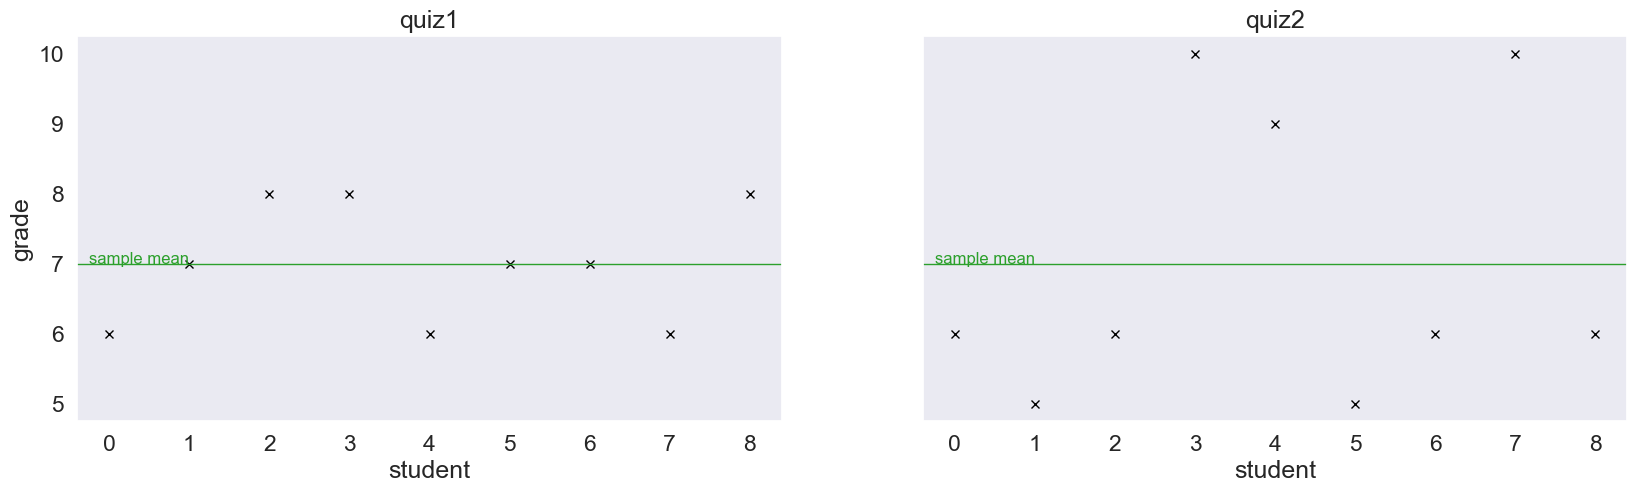

In [45]:
sns.set(font_scale=1.5)

f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'x', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(False)
    print(df_grades.shape[0])
    ax.axhline(df_grades[label].mean(), color='tab:green', ls='-', lw=1)
    ax.annotate(xy = (df_grades.shape[0]-8, df_grades[label].mean()), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)

**Sample Median** is the "halfway" point (the 50th percentile) of a set of sorted values:
- half of the remaining data is greater than median
- half of the remaining data is less than  median

If a set of numbers has an even number of points then median is mean of middle most two points.

In [36]:
df_grades.median()

quiz1    7.0
quiz2    6.0
dtype: float64

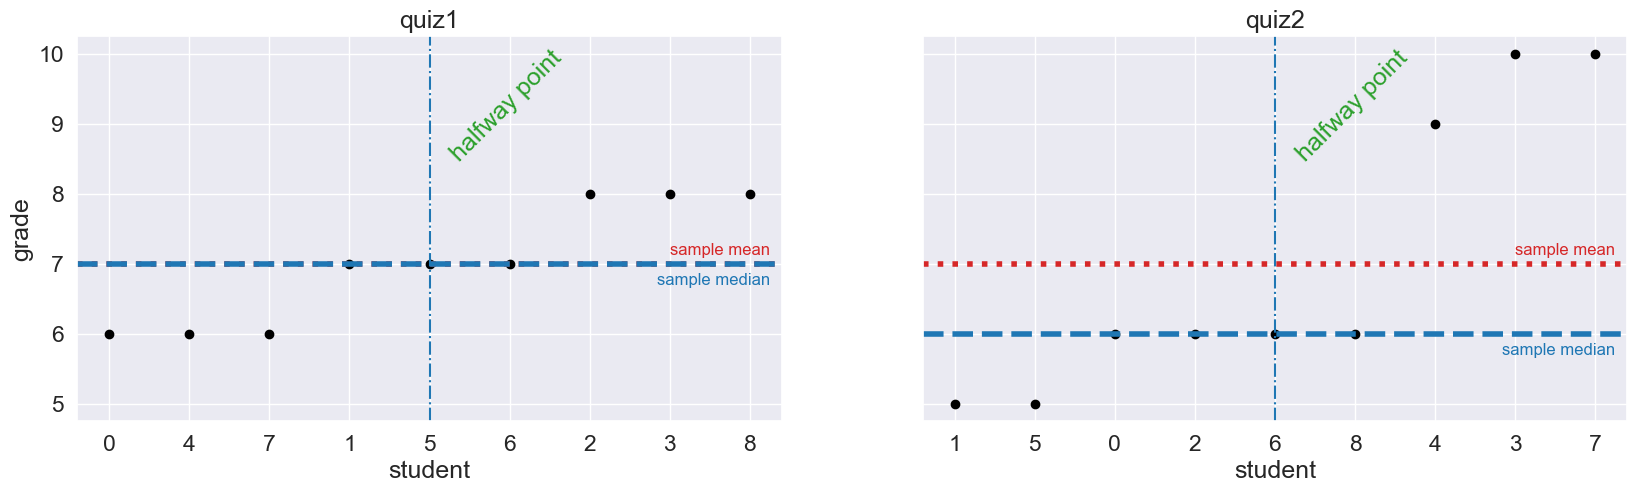

In [48]:
f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label].sort_values().values, 'o', color='black')
    ax.set_xticks(range(0, len(df_grades)))
    ax.set_xticklabels(df_grades[label].sort_values().index)
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:red', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:red')
    
    ax.axhline(df_grades[label].median(), color='tab:blue', ls='--', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].median()-.125), text='sample median',
               ha='right', fontsize=12, color='tab:blue', va='top')
    
    ax.annotate(xy = (.525, .975), color='tab:green', xycoords='axes fraction', rotation=45, 
               text = 'halfway point', va='top', ha='left')
    
    ax.axvline((len(df_grades)-1)/2, ls='-.', color='tab:blue')
    
axes[0].set_ylabel('grade')
f.set_size_inches(20, 5)

Median is an attractive measure of center when:
- data is inconsistently distributed (e.g. log scaled data)
- data contains outliers
    **outlier:** a value which is atypically far from the average (datum are typically closer to the average)

## Measures of Spread for Numerical Data:

- Sample Variance
- Sample Standard Deviation
- Sample Quartiles

## Observations vs Ground Truth

    Fishing in a new pond, you catch fish which are 3 lbs and another which is 5 lbs.  
    What can (and can't) you say about the average fish weight in the pond?


- **Observed** data points can be collected from an experiment.
- The **Ground Truth** describes information which is absolutely true.  
    - we rarely know ground truth information about distributions
        - instead ... we estimate them
        
       
### Language (and notation) to distinguish between observations and ground truth:

| **Observed**                             | **Ground Truth**            |
|------------------------------------------|-----------------------------|
| Sample Mean $\bar{x}$                    | Expected Value $E[x], \mu$       |
| Sample Standard Deviation $\hat{\sigma}$ | Standard Deviation $\sigma$ |
| Sample Variance $\hat{\sigma^2}$         | Variance $\sigma^2$         |

(In DS practice, because almost all our data is observed, we rarely say "Sample Mean" and usually just say "Mean", and usually when folks just say "Standard Deviation" or "Variance" they mean the "Sample Standard Deviation" and "Sample Variance")
    

### Variance and Sample Variance
**Variance** is the average squared distance from the mean. 
$$ \sigma^2 = \frac{1}{N} \sum_i (x_i-\mu)^2 $$
where $\mu$ is the expected value of the distribution that $x_i$ came from.

Rarely do we know the distribution (or its mean $\mu$).  The best we can do is estimate this value as the **Sample Variance**:
$$ \hat{\sigma}^2 = \frac{1}{N-1} \sum_i (x_i-\bar{x})^2 $$
where $\bar{x}$ is the sample mean.  

**Note the $\frac{1}{N-1}$ term in Sample Variance (Bessel's Correction) differs from the $\frac{1}{N}$ term in Variance above.**

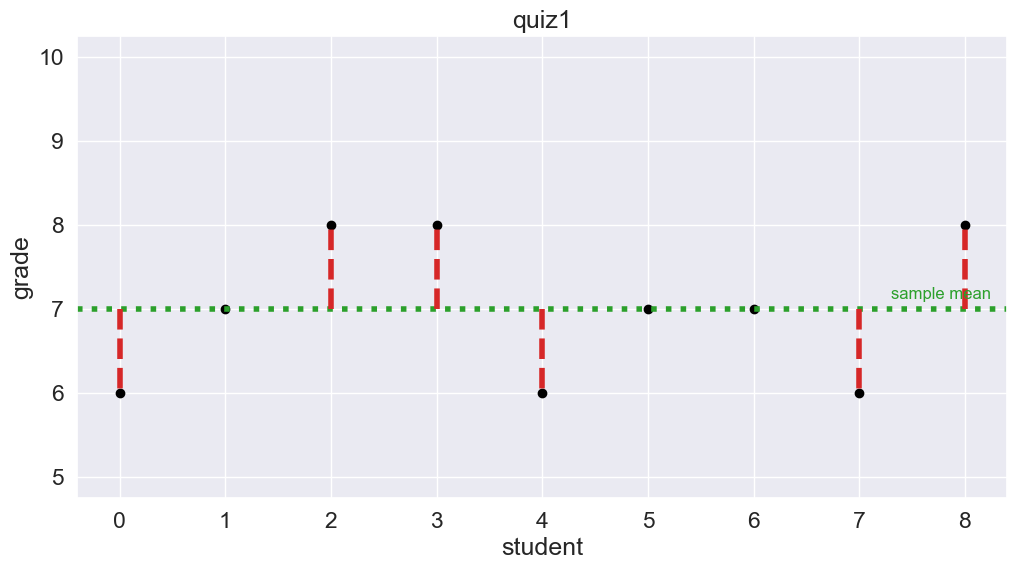

In [38]:
f, ax = plt.subplots()
label='quiz1'
ax.plot(df_grades[label], 'o', color='black')
ax.set_title(label)
ax.set_xlabel('student')
ax.grid(True)
ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
           ha='right', fontsize=12, color='tab:green')
ax.set_ylim([4.75, 10.25])

for idx, el in enumerate(df_grades[label]):
    ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

ax.set_ylabel('grade')
f.set_size_inches(12, 6)

Here the red line are the distances from the mean. Look at the formula: If you calculate for the first data point we have the value of 6 and mean is 7, so 6-7 is -1, hence the red line goes below the mean.

Here we have six instances where the distance is 1 (and the square of distance is also 1). Sum that and divide by the number of students -1 (8) and we get $\frac{6}{8}=\frac{3}{4}$

In [38]:
df_grades['quiz1'].var()

np.float64(0.75)

6
7
8
8
6
7
7
6
8
6
5
6
10
9
5
6
10
6


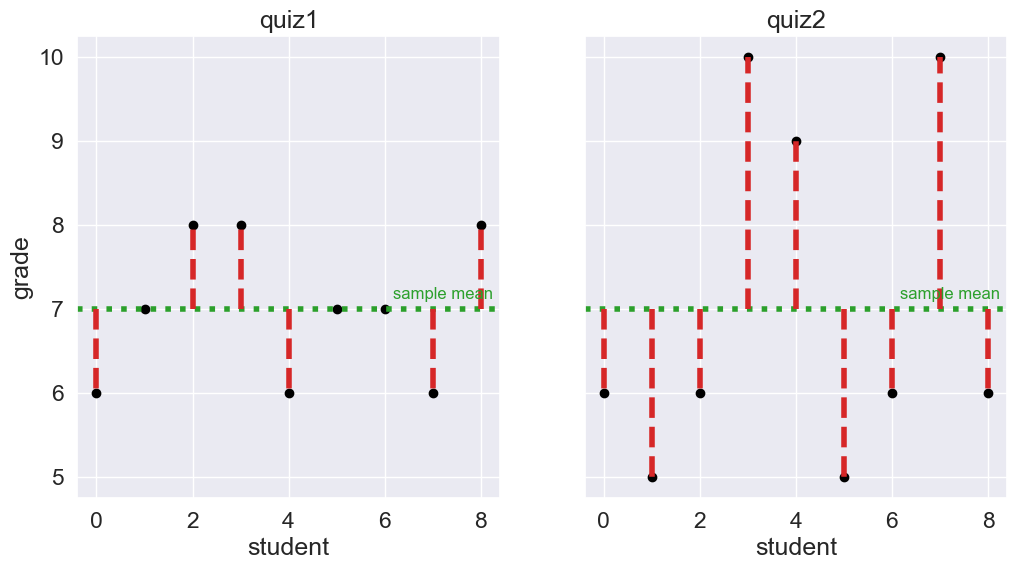

In [19]:
f, axes = plt.subplots(1, 2, sharey=True)
for ax, label in zip(axes, df_grades.columns):
    ax.plot(df_grades[label], 'o', color='black')
    ax.set_title(label)
    ax.set_xlabel('student')
    ax.grid(True)
    ax.axhline(df_grades[label].mean(), color='tab:green', ls=':', lw=4)
    ax.annotate(xy = (df_grades.shape[0]-0.75, df_grades[label].mean()+.125), text='sample mean',
               ha='right', fontsize=12, color='tab:green')
    ax.set_ylim([4.75, 10.25])

    for idx, el in enumerate(df_grades[label]):
        print(el)
        ax.plot([idx, idx], [df_grades[label].mean(), el], lw=4, ls='--', color='tab:red')

axes[0].set_ylabel('grade')
f.set_size_inches(12, 6)

In [40]:
df_grades = pd.DataFrame({'quiz1': [6, 7, 8, 8, 6, 7, 7, 6, 8],
                          'quiz2': [6, 5, 6, 10, 9, 5, 6, 10, 6]})
df_grades

,quiz1,quiz2
0,6,6
1,7,5
2,8,6
3,8,10
4,6,9
5,7,5
6,7,6
7,6,10
8,8,6


In Quiz 2 we see that the sample mean is the same, but the distances from the mean are bigger:
$$ \hat{\sigma}^2 = \frac{1}{9-1} \cdot((-1)^2 + (-2)^2 + (-1)^2 + 3^2 + 2^2 + (-2)^2 + (-1)^2 + 3^2 + (-1)^2) = \frac{34}{8} = 4.25$$

In [41]:
df_grades.var()

quiz1    0.75
quiz2    4.25
dtype: float64

Even though the average for the two quizes are the same it seems like the quizes were different:
* all the students found the first quiz similarly difficult.
* some students nailed the second quiz and some there were also some did quite poorly

### Standard deviation
Standard deviation is just the square root of the variance:

$$ \hat{\sigma} = \sqrt{\hat{\sigma}^2} = \sqrt{\frac{1}{N-1} \sum_i (x_i-\bar{x})^2} $$

#### Common misconception:
Wait, square root of average squared distance from mean ... isn't it just the average distance from mean?

No!
* square root of a sum does not equal the sum of square roots 

In [42]:
# compute standard deviation
df_grades.std()

quiz1    0.866025
quiz2    2.061553
dtype: float64

In [43]:
# compute square root of variances (same as std dev)
np.sqrt(df_grades.var())

quiz1    0.866025
quiz2    2.061553
dtype: float64

### Co-variance & correlation: Qualitatively
(How two values vary together)

The behavior between any two values x and y can be summarized in one of the three ways:
1. as x gets larger y typically gets larger too
    - ex: 
        - `x=temp on some day`
        - `y=number of people on the beach on the same day`
    - covariance & correlation is positive
2. as x gets larger y typically doesn't get larger or smaller
    - ex: 
        - `x=individual's favorite number`
        - `y=number of hot dogs that individual has eaten in their lifetime`
    - covariance & correlation is zero
3. as x gets larger, y typically gets smaller
    - ex: 
        - `x=average speed of driver on 10 mile commute`
        - `y=average commute time of driver on 10 mile commute`
    - covariance & correlation are negative

Covariance & Correlation are only defined between two values when the observations are somehow **linked**:
1. on the same **day**, we observe temp & beach population
1. on the same **individual**, we observe favortie number & hot dogs eaten
1. on the same **driver**, we observe speed and commute time

If we don't observe the data in pairs, correlation / covariance is not defined:
- `x=an individual's favorite number`
- `y=the temperature on a given day`

`x` is observed per individual while `y` is observed per day ... there isn't a way to "pair" every x with a y!

In [44]:
df_poke.iloc[:,3:].cov()

,height,weight,damage,basespeed,attack,defense
height,1434.948698,2812.923275,263.536645,202.599603,313.770817,366.510684
weight,2812.923275,17239.445888,1673.129204,185.234597,1605.373603,1452.893957
damage,263.536645,1673.129204,817.131921,-31.478764,226.885607,92.157130
basespeed,202.599603,185.234597,-31.478764,715.395585,144.560927,-38.338322
attack,313.770817,1605.373603,226.885607,144.560927,715.852539,347.606181
defense,366.510684,1452.893957,92.157130,-38.338322,347.606181,724.508962


## Computing Co-variance ("by hand")

**Goal**: 

compute the covariance of x and y below:

In [45]:
df_car = pd.DataFrame({'car weight (x)': [-2, -1, 0, 1, 2],
                       'mpg (y)': [4, 2, 0, -2, -4]},
                      index=['car0', 'car1', 'car2', 'car3', 'car4'])
df_car

,car weight (x),mpg (y)
car0,-2,4
car1,-1,2
car2,0,0
car3,1,-2
car4,2,-4


**Sample covariance:**
$$ \texttt{cov}(x, y) = \frac{1}{N-1} \sum_i (x_i - \bar{x})(y_i - \bar{y})$$


**Compute:**

|      | x | y | $$ x_i - \bar{x}$$ | $$y - \bar{y}$$ | $$ (x_i - \bar{x})(y - \bar{y})$$ |
|-----:|---------------:|--------:|--------------------|-----------------|-----------------------------------|
| car0 |              -2 |       4 | -2                 | 4               | -8                                |
| car1 |              -1 |       2 | -1                 | 2               | -2                                |
| car2 |              0 |       0 | 0                  | 0               | 0                                 |
| car3 |              1 |       -2 | 1                  | -2              | -2                                |
| car4 |              2 |       -4 | 2                  | -4              | -8                                |

In [46]:
num_car = 5
sample_cov = (-8 -2 +0 -2 -8) / (num_car - 1)
sample_cov

-5.0

## Anatomy of a Covariance Matrix (computing covariance via computer)

In [47]:
# returns a full covariance matrix
df_car.cov()

,car weight (x),mpg (y)
car weight (x),2.5,-5.0
mpg (y),-5.0,10.0


A covariance matrix contains the covariance of every pair of elements:
    
|   |         x |         y |
|--:|----------:|----------:|
| x | cov(x, x) | cov(x, y) |
| y | cov(y, x) | cov(y, y) |

- Note 1: cov(x, y) = cov(y, x) (always, not just in this example)
- Note 2: cov(x, x) is the variance of x and itself

In [48]:
# variance diagonal of the covariance matrix
df_car.var()

car weight (x)     2.5
mpg (y)           10.0
dtype: float64

## Correlation (motivation)

Covariance by itself is not actually very useful, since the units are not (usually) interpretable. Instead, we usually use correlation.

Which has a more consistent relationship? (or maybe they're the same?)
- height of a person in `inches`
- height of a person in `cm`

or
- height of a person in `inches`
- height of a person in `feet`

In [49]:
inch_to_cm = 2.54
inch_to_feet = 1/12

df_height = pd.DataFrame({'height_inches': [68, 69, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height

,height_inches,height_cm,height_feet
0,68,172.72,5.666667
1,69,175.26,5.750000
2,70,177.80,5.833333
3,72,182.88,6.000000
4,55,139.70,4.583333
5,77,195.58,6.416667


In [50]:
df_height.cov()

,height_inches,height_cm,height_feet
height_inches,53.900000,136.906000,4.491667
height_cm,136.906000,347.741240,11.408833
height_feet,4.491667,11.408833,0.374306


- Covariance between `height_inches` and `height_cm` ~= 136
- Covariance between `height_inches` and `height_feet` ~= 4

So is there a stronger relationship between `height_inches` and `height_cm`? ...

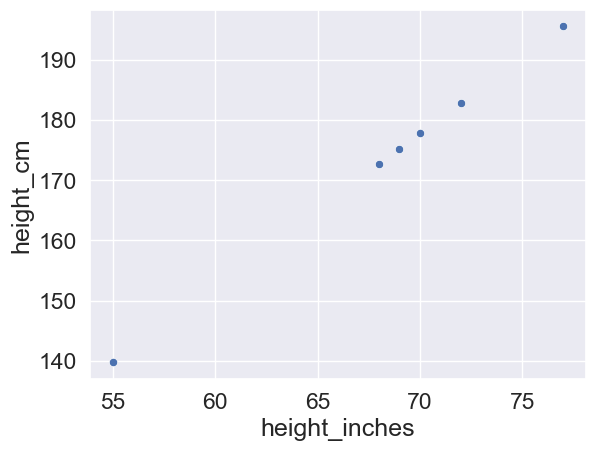

In [51]:
sns.scatterplot(data=df_height, x='height_inches', y='height_cm');

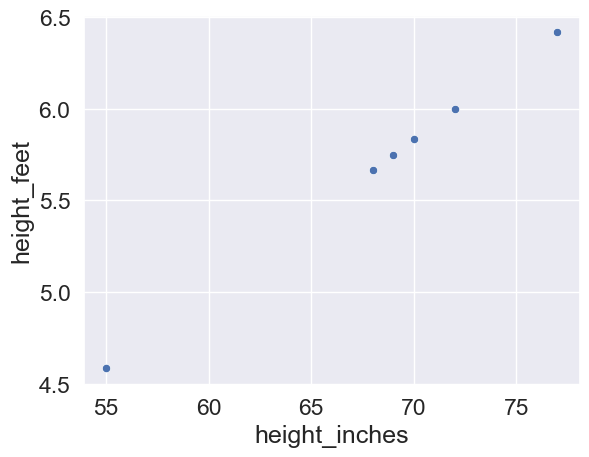

In [52]:
sns.scatterplot(data=df_height, x='height_inches', y='height_feet');

So is there a stronger relationship between `height_inches` and `height_cm`? ...

... not at all, they have the *same* relationship.  Its just that covariance depends on the units we measure in.  Smaller units -> bigger values -> bigger covariance.

## The 'strongest' relationship between two variables

In some sense, this is the 'strongest' possible relationship.  When one variable increases, the other always does so too.  

**Helpful fact:**
The covariance is always smaller than the product of the standard deviations of both variables:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

### Question: What does it mean that this is the 'strongest' possible relationship, and that the covariances are as large as they can possibly be?

In [53]:
# compute the correlation matrix (each item is correlation of that row & column)
df_height.corr()

,height_inches,height_cm,height_feet
height_inches,1.0,1.0,1.0
height_cm,1.0,1.0,1.0
height_feet,1.0,1.0,1.0


## Correlation (Compute)

Remember, the biggest (and smallest) covariance we can possibly have is the product of the standard deviations:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

Correlation: "How big of a covariance do you have comapred to how big it could possibly be?"

$$corr(x,y) = \frac{\texttt{cov}(x, y)}{\sigma_x \sigma_y} $$

In doing so, it removes any effect of the scale of the data might have (e.g. changing units).

## Let's discuss Correlation some more

Correlations are shown above each scatter (credit: wikipedia)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" alt="Drawing" style="width: 800px;"/>

Common misconception:

- if x and y are independent, then they're uncorrelated
- if x and y are uncorrelated, they need not be uncorrelated
    - (see examples in last row directly above)

## The most important correlation/covariance slide: why did we go through all this trouble?

- mean describes where a feature typically is
- variance / standard deviation describes how consistently a feature stays near its mean
- correlation describes which relationship two values have:
    - when x increases, y typically increases
    - when x increases, y typically stays the same
    - when x increases, y typically decreases
    - **MOST IMPORTANTLY**: Just because two features have a correlation, **does not** mean they have anything to do with each other: [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)

![sd](https://miro.medium.com/v2/resize:fit:547/1*2BnD3YAUBGNutkKiG5dKfg.jpeg)

# Statistics as a language

Knowing the meaning of these statistics helps tell the story of the data (what it looks like, what relationships are in it, etc)

In [54]:
df_penguins = sns.load_dataset('penguins')
df_penguins.iloc[:,2:6].mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [55]:
df_penguins.iloc[:,2:6].cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [56]:
df_penguins.iloc[:,2:6].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


C:\Users\eager\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



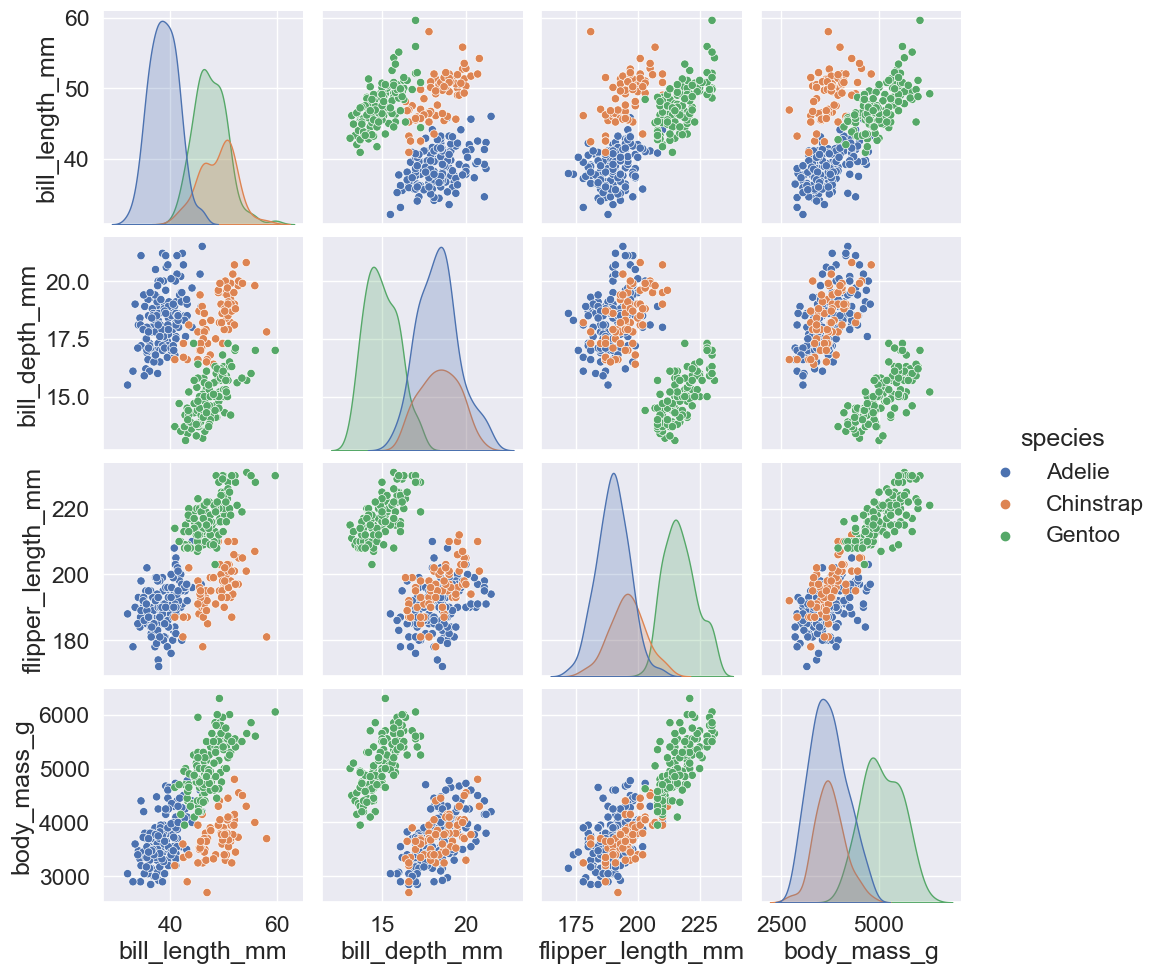

In [57]:
sns.pairplot(df_penguins, hue='species');

## Reminder: representing data (samples & features)
To describe a collection of **samples** we record a set of **features** for each sample.

For example, when describing penguins:

In [41]:
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True)

df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Each penguin is a sample for which we've observed 7 features:
- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex 

A numerical dataset can be represented as an array (we'll return to those categorical variables `species`, `island` and `sex` later on). 

**By convention, sklearn (our Python ML library) represent:**
- each sample as a row 
- each feature as a column 

**as is shown above.**

# Put this convention to memory, it is popular

## Samples as vectors (or, "Uh-Oh, here comes some math!")

In [59]:
# only focus on numerical features (for now)
col_num_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_penguin_num = df_penguin.loc[:, col_num_list]

# for pedagogical reasons, we need penguin1 to have slightly different values
df_penguin_num.iloc[1, :] = [40.2, 17.9, 194.0, 3700]

df_penguin_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,40.2,17.9,194.0,3700.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Individual samples (penguins) are considered, mathematically, as vectors.  When sklearn looks at the first penguin it sees:

In [60]:
np.array(df_penguin_num.iloc[0, :])

array([  39.1,   18.7,  181. , 3750. ])

## Distances between samples
Many ML tools require that these vectors have meaningful distances between them.  
- A pair of samples with a large distance between them are considered different
- A pair of samples with a small distance between them are considered similar

Computing (the $\ell_2$, or Euclidean) distance between two vectors $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$:

$$||x - x'||_2 = \sqrt{\sum_i (x_i - x_i')^2}$$

In words, to compute the distance between two vectors:
- we square the differences of each element
- add these values together
- compute the square root of this sum

How similar is penguin0 to penguin1?

In [61]:
penguin0 = df_penguin_num.iloc[0, :]
penguin0

bill_length_mm         39.1
bill_depth_mm          18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: 0, dtype: float64

In [62]:
penguin1 = df_penguin_num.iloc[1, :]
penguin1

bill_length_mm         40.2
bill_depth_mm          17.9
flipper_length_mm     194.0
body_mass_g          3700.0
Name: 1, dtype: float64

In [63]:
sq_diff_per_feat = [(39.1 - 40.2) ** 2, (18.7 - 17.9) ** 2, (181 - 194) ** 2, (3750 - 3700) ** 2]
l2_dist = sum(sq_diff_per_feat) ** .5
l2_dist

51.68026702717392

In and of itself, this distance isn't too insightful ... the penguins are 50 ?unit? apart?  The value becomes more useful when compared to other distances.  Is penguin 1 more similar to penguin 0 or penguin 2?

In [64]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 51.680
distance between penguin1 and penguin2: 450.001


So: penguin0 and penguin1 are more similar since we observed:

    distance between penguin0 and penguin1: 51.680
    distance between penguin1 and penguin2: 450.001
    
Is this satisfying or should penguin1 and penguin2 be considered more similar?  Lets break it out by feature:

In [65]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[0, :]

bill_length_mm        1.1
bill_depth_mm        -0.8
flipper_length_mm    13.0
body_mass_g         -50.0
dtype: float64

In [66]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[2, :]

bill_length_mm        -0.1
bill_depth_mm         -0.1
flipper_length_mm     -1.0
body_mass_g          450.0
dtype: float64

The bills and flippers of penguin2 and penguin1 are just about identical ... but their difference in body mass is so large that it yields a large distance.

## Big Idea 1: Distances assume that a change of 1 unit (in any feature) is equally significant

What if we measured the body mass of the penguin in a different unit?

In [67]:
# replace body_mass_g with body_mass_kg
df_penguin_num['body_mass_kg'] = df_penguin_num['body_mass_g'] / 1000
del df_penguin_num['body_mass_g']

df_penguin_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg
0,39.1,18.7,181.0,3.75
1,40.2,17.9,194.0,3.70
2,40.3,18.0,195.0,3.25


In [68]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 13.071
distance between penguin1 and penguin2: 1.106


These numbers aren't just different, they claim an opposite conclusion: penguin1 and penguin2 are more similar!

- **Distances assume that a change of 1 unit (in any feature) is equally significant**
- **Distances implicitly weight how important each feature is relative to others according to its variance**
    - a feature with a higher variance is responsible for more of the distances
    
To wrap all the different features into a single distance we must say *something* about how important one feature is compared to another.  

In [69]:
df_penguin_num.std()

bill_length_mm        5.467070
bill_depth_mm         1.969606
flipper_length_mm    13.996877
body_mass_kg          0.805387
dtype: float64

### Scale Normalization:
How to scale your features so that they're equally important in our distance metric:

In [70]:
# by dividing each feature by the standard deviation, outputs will have same std dev
df_penguin_num_scaled = pd.DataFrame()
for feat in df_penguin_num.columns:
    df_penguin_num_scaled[f'{feat}_scaled'] = df_penguin_num[feat] / df_penguin_num[feat].std()

In [71]:
df_penguin_num_scaled.std()

bill_length_mm_scaled       1.0
bill_depth_mm_scaled        1.0
flipper_length_mm_scaled    1.0
body_mass_kg_scaled         1.0
dtype: float64

In [72]:
df_penguin_num_scaled.head(3)

,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled,body_mass_kg_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Notice that in doing so, our units are no longer valid, so lets remove the units:

In [73]:
df_penguin_num_scaled.columns = ['bill_length_scaled',
                                'bill_depth_scaled',
                                'flippter_length_scaled',
                                'body_mass_scaled']
df_penguin_num_scaled.head(3)

,bill_length_scaled,bill_depth_scaled,flippter_length_scaled,body_mass_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Now, which penguins are actually most similar?

In [74]:
vec_penguin0 = np.array(df_penguin_num_scaled.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num_scaled.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num_scaled.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 1.035
distance between penguin1 and penguin2: 0.566


### Note on Normalization:

There are **many** ways to normalize data! The above is only one (very simple) way, but is actually not the most popular. In addition to scale normalizing, there is also:

- **Standardization** (probably the most common): subtract all features by their **mean**, then divide by their **standard deviation**
- **Min-Max Scaling**: subtract all features by their **minimum**, then divide by their **range**

I may use any of the three (scale normalization, standardization, min-max scaling), but will most often use scale normalization because it's the easiest...

# What do we do with categorical features?
## One hot encoding and "Dummy" variables
### (Representing categorical variables in the sample vector as numbers)

**One hot encoding:** replace each categorical column with a set of columns per each unique category.  These new columns (called dummy variables) have value 1 where the original row belonged to the corresponding category.

![g](https://preview.redd.it/ml-terminology-strikes-again-v0-6f7z17ptl6xa1.jpg?width=640&crop=smart&auto=webp&s=e778bd2f290263bbb72f490db819faab9f6c5ebe)

In [75]:
df_penguin = sns.load_dataset('penguins')

# discard penguins with missing features
df_penguin.dropna(axis=0, inplace=True)

# shuffle order of rows
df_penguin = df_penguin.sample(frac=1, random_state=1)

# grab only the first few rows
df_penguin = df_penguin.head()

df_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,Male
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,Female


In [76]:
pd.get_dummies(df_penguin, columns=['species'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
65,Biscoe,41.6,18.0,192.0,3950.0,Male,True,False,False
276,Biscoe,43.8,13.9,208.0,4300.0,Female,False,False,True
186,Dream,49.7,18.6,195.0,3600.0,Male,False,True,False
198,Dream,50.1,17.9,190.0,3400.0,Female,False,True,False
293,Biscoe,46.5,14.8,217.0,5200.0,Female,False,False,True


In [77]:
pd.get_dummies(df_penguin, columns=['species', 'island', 'sex'], dtype='float')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,sex_Female,sex_Male
65,41.6,18.0,192.0,3950.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
276,43.8,13.9,208.0,4300.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
186,49.7,18.6,195.0,3600.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
198,50.1,17.9,190.0,3400.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
293,46.5,14.8,217.0,5200.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
